In [2]:
import numpy as np
import pandas as pd


In [3]:
data =pd.read_csv("50_Startups.csv")

In [4]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [6]:
data.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [18]:
from sklearn.preprocessing import LabelEncoder
en = LabelEncoder()
data['State'] = en.fit_transform(data['State'])


In [19]:
X = data.iloc[:,:4]
y = data.iloc[:,4]

In [20]:
X

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,2
1,162597.70,151377.59,443898.53,0
2,153441.51,101145.55,407934.54,1
3,144372.41,118671.85,383199.62,2
4,142107.34,91391.77,366168.42,1
5,131876.90,99814.71,362861.36,2
6,134615.46,147198.87,127716.82,0
7,130298.13,145530.06,323876.68,1
8,120542.52,148718.95,311613.29,2
9,123334.88,108679.17,304981.62,0


<AxesSubplot:>

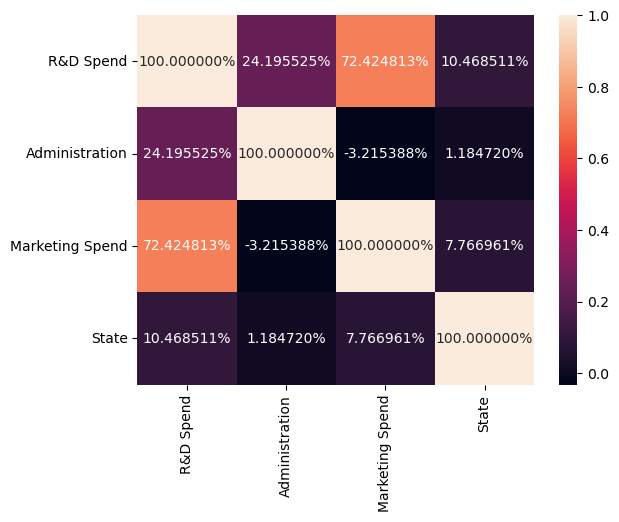

In [23]:
import seaborn as sns
sns.heatmap(X.corr() , annot = True, fmt = '%')


In [29]:
from sklearn.model_selection import train_test_split
X_train, Y_train, X_test, Y_test = train_test_split(X,y, test_size = 0.25, random_state = 11 )

In [32]:
def Models(X_train, Y_train):
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression()
    log.fit(X_train, Y_train)
    
    from sklearn.tree import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
    forest.fit(X_train, Y_train)
    
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(n_estimators = 10, criterion = 'entropy')
    tree.fit(X_train, Y_train)
    
    from sklearn.pipeline import make_pipeline
    from sklearn.svm import SVC
    from sklearn.preprocessing import StandardScaler
    pipe = pipline(StandardScalar(), SVC(gamma = 'auto'))
    pipe.fit(X_train, Y_train)
    
    
    print(log.score(X_train, Y_train))
    print(forest.score(X_train, Y_train))
    print(tree.score(X_train, Y_train))
    print(pipe.score(X_train, Y_train))
    

In [33]:
model = Models(X_train, Y_train)

ValueError: y should be a 1d array, got an array of shape (13, 4) instead.